# ACADEMIC INTERGITY STATEMENT
"I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work."

# part 3 : Linear Regression

In [1]:
import statistics as st
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# read csv file
PenguinD = pd.read_table('penguins_size.csv',sep=',')

In [3]:
# main statistics with pandas
print(PenguinD.describe)
print(PenguinD.head)
print(PenguinD.index)
print(PenguinD.columns)
print(PenguinD.dtypes)
print(PenguinD.size)
print(PenguinD.shape)

print("\nMAX\n")
print(PenguinD.max(axis = 0))
print("\nmin\n")
print(PenguinD.min(axis = 0))
print("\nmedian\n")
print(PenguinD.median(axis = 0))
print("\nmean\n")
print(PenguinD.mean(axis = 0))
print("\nstdev\n")
print(PenguinD.std(axis = 0))

<bound method NDFrame.describe of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     

C:\Users\User\AppData\Local\Temp/ipykernel_1016/400075466.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(PenguinD.max(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_1016/400075466.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(PenguinD.min(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_1016/400075466.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(PenguinD.median(axis = 0))
C:\Users\User\AppData\Local\Temp/ipykernel_1016/400075466.py:17:

In [4]:
print(pd.isnull(PenguinD).sum(axis=0))
PenguinD=PenguinD.dropna()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [5]:
PenguinD['species'] = PenguinD['species'].replace('Adelie', 0).replace('Chinstrap', 1).replace('Gentoo', 2)
PenguinD['island'] = PenguinD['island'].replace('Biscoe', 0).replace('Dream', 1).replace('Torgersen', 2)
PenguinD['sex'] = PenguinD['sex'].replace('FEMALE', 0).replace('MALE', 1).replace('.',0)

PenguinD["species"] = PenguinD["species"].astype("category")
PenguinD["island"] = PenguinD["island"].astype("category")
PenguinD["sex"] = PenguinD["sex"].astype("category")

In [6]:
NpenD = PenguinD
NpenD["culmen_length_mm"] = (NpenD['culmen_length_mm']-min(NpenD['culmen_length_mm']))/((max(NpenD['culmen_length_mm'])-min(NpenD['culmen_length_mm'])))
NpenD["culmen_depth_mm"] = (NpenD['culmen_depth_mm']-min(NpenD['culmen_depth_mm']))/((max(NpenD['culmen_depth_mm'])-min(NpenD['culmen_depth_mm'])))
NpenD["flipper_length_mm"] = (NpenD['flipper_length_mm']-min(NpenD['flipper_length_mm']))/((max(NpenD['flipper_length_mm'])-min(NpenD['flipper_length_mm'])))
NpenD["body_mass_g"] = (NpenD['body_mass_g']-min(NpenD['body_mass_g']))/((max(NpenD['body_mass_g'])-min(NpenD['body_mass_g'])))

In [7]:
# 80% training and 20% testing
sample80 = NpenD.sample(frac=0.8,random_state=1)
sample20 = NpenD.drop(sample80.index)

#Y = sex
#X = elses
X_train = sample80.iloc[:,:6]
Y_train = sample80.iloc[:,6:7]
X_test = sample20.iloc[:,:6]
Y_test = sample20.iloc[:,6:7]

print("X_train Y_train X_test Y_test")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

X_train Y_train X_test Y_test
(267, 6) (267, 1) (67, 6) (67, 1)


In [8]:
# weights with the OLS equation
X = np.array(X_train)
X = np.insert(X,0,1,axis = 1) #place a 1 in front of the matrix
Xt = np.transpose(X)
Y = np.array(Y_train)
w_OLS = np.dot(np.dot(np.linalg.inv(np.dot(Xt,X)),Xt),Y)

Xtest = np.array(X_test)
Xtest = np.insert(Xtest,0,1,axis = 1) #place a 1 in front of the matrix
predicty = np.array(Y_test)
Ytest = np.array(Y_test)

print("weight of OLS is")
print(str(np.transpose(w_OLS)))

# Loss in OLS
    #method 1 
sums = 0
for i in range(X.shape[0]):
    sums = sums + (Y[i]-np.dot(np.transpose(w_OLS),X[i]))**2
Jw_OLS1 = sums/2
    #method 2
Jw_OLS2 = (1/2)* np.dot(np.transpose(Y-np.dot(X,w_OLS)),(Y-np.dot(X,w_OLS)))

print("loss of OLS is "+str(Jw_OLS1))

weight of OLS is
[[-0.83800874 -0.3279696  -0.01867055  0.88584247  0.98788362  0.23648561
   1.63950284]]
loss of OLS is [11.96070776]


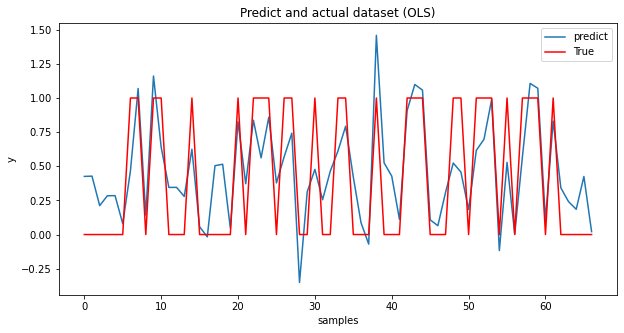

In [9]:
# plot predictions
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.dot(Xtest,w_OLS), label = "predict")
ax.plot(Ytest,'r', label = 'True')
ax.legend()
ax.set_title('Predict and actual dataset (OLS)')
ax.set_xlabel('samples')
ax.set_ylabel('y')
plt.show()

In [10]:
# Get the predictions and calculating the sum of squared errors
# # MSE
sums = 0
for i in range(Xtest.shape[0]):
    sums = sums + (Ytest[i]-np.dot(np.transpose(w_OLS),Xtest[i]))**2
MSE = sums/X_test.shape[0]
print("MSE = "+str(MSE))

MSE = [0.09642581]


# Part 4: Ridge Regression

In [18]:
# weights with the RR

lambda1 = 0.009
I = np.dot(np.transpose(w_OLS),w_OLS)
w_RR = np.dot(np.dot(np.linalg.inv(np.dot(Xt,X)+lambda1*I),Xt),Y)

print("weight of Ridge Regression is")
print(str(np.transpose(w_RR)))

# Loss in RR
    #method 1 
sums = 0
for i in range(X.shape[0]):
    sums = sums + (Y[i]-np.dot(np.transpose(w_RR),X[i]))**2
Jw_RR1 = sums/2 + (lambda1*I)/2
    #method 2
Jw_RR2 = (1/2)* np.dot(np.transpose(Y-np.dot(X,w_RR)),(Y-np.dot(X,w_RR)))+ lambda1*I/2

print("loss of RR is "+str(Jw_RR1))

weight of Ridge Regression is
[[-0.83049036 -0.3234628  -0.01878732  0.87421949  0.98696485  0.22734469
   1.63469369]]
loss of RR is [[11.98551345]]


In [19]:
# Get the predictions and calculating the sum of squared errors
# # MSE
sums = 0
for i in range(Xtest.shape[0]):
    sums = sums + (Ytest[i]-np.dot(np.transpose(w_RR),Xtest[i]))**2
MSE = sums/X_test.shape[0]
print("MSE = "+str(MSE))

MSE = [0.09654267]


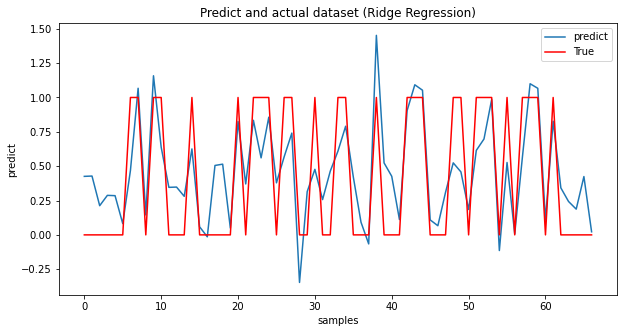

In [13]:
# plot predictions
Xtest = np.array(X_test)
Xtest = np.insert(Xtest,0,1,axis = 1) #place a 1 in front of the matrix
predicty = np.array(Y_test)
Ytest = np.array(Y_test)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.dot(Xtest,w_RR), label = "predict")
ax.plot(Ytest,'r', label = 'True')
ax.legend()
ax.set_title('Predict and actual dataset (Ridge Regression)')
ax.set_xlabel('samples')
ax.set_ylabel('predict')
plt.show()

# Bonus

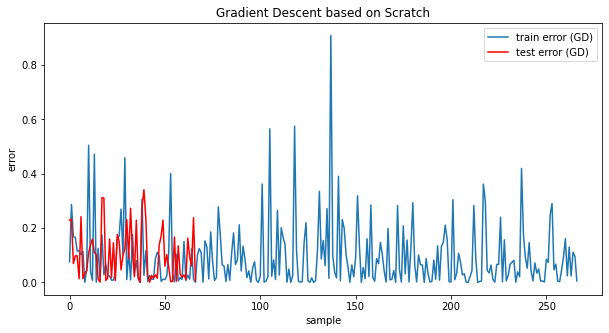

MSE_errors_train_GD [0.09258725]
MSE_errors_test_GD [0.10355089]
time cost of training 0.018181800842285156


In [22]:
# gradient descent method from scratch

import time

start = time.time() #start timer

w_add = []
alpha = 0.1
for i in range(7):
    sums = 0
    for j in range(X.shape[0]):
        sums = sums + (Y[j]-np.dot(np.transpose(w_RR),X[j]))*X[j][i]
    w_add.append(sums)
    
w_GD = w_RR + alpha* np.array(w_add) #new weight based on RR

end = time.time() #stop timer

errors_train_GD = (np.dot(X,w_GD)-Y)**2
errors_test_GD = (np.dot(Xtest,w_GD)-Ytest)**2




fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(errors_train_GD, label = "train error (GD)")
ax.plot(errors_test_GD,'r', label = 'test error (GD)')
ax.legend()
ax.set_title('Gradient Descent based on Scratch')
ax.set_xlabel('sample')
ax.set_ylabel('error')
plt.show()

MSE_errors_train_GD = sum(errors_train_GD)/len(errors_train_GD)
print("MSE_errors_train_GD "+str(MSE_errors_train_GD))
MSE_errors_test_GD = sum(errors_test_GD)/len(errors_test_GD)
print("MSE_errors_test_GD "+str(MSE_errors_test_GD))

print("time cost of training "+str(end - start))

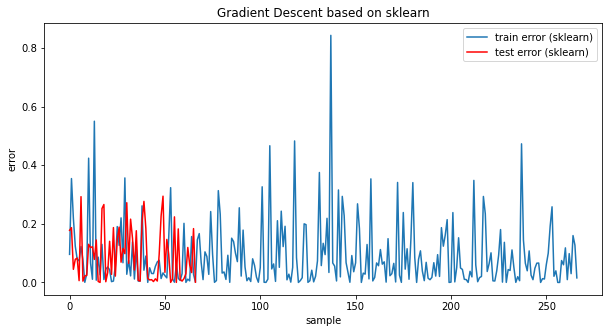

MSE_errors_train_sk 0.08962069191682183
MSE_errors_test_sk 0.09686432781715514
time cost of training 0.0019986629486083984


In [23]:
# gradient descent method from sklearn

# from sklearn.linear_model import SGDRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
y_sk = np.reshape(Y,(267))
X_sk = np.reshape(X,(267,7))

y_sk_test = np.reshape(Ytest,(67))
X_sk_test = np.reshape(Xtest,(67,7)) 

start = time.time() #start timer
    
clf = Ridge(alpha=0.1)
clf.fit(X_sk, y_sk)
errors_train_sk = (clf.predict(X_sk)-y_sk)**2
errors_test_sk = (clf.predict(X_sk_test)-y_sk_test)**2

end = time.time() #stop timer

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(errors_train_sk, label = "train error (sklearn)")
ax.plot(errors_test_sk,'r', label = 'test error (sklearn)')
ax.legend()
ax.set_title('Gradient Descent based on sklearn')
ax.set_xlabel("sample")
ax.set_ylabel('error')
plt.show()

MSE_errors_train_sk = sum(errors_train_sk)/len(errors_train_sk)
print("MSE_errors_train_sk "+str(MSE_errors_train_sk))
MSE_errors_test_sk = sum(errors_test_sk)/len(errors_test_sk)
print("MSE_errors_test_sk "+str(MSE_errors_test_sk))
print("time cost of training "+str(end - start))

In [17]:
#Reference
 # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html